In [1]:
import pandas as pd

In [16]:
import gensim

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
import os

In [14]:
import numpy as np

In [89]:
df = pd.read_csv('word_list_chinese.csv')

In [6]:
cd chi_models

/mnt/ide0/home/isabelladuan/chi_models


In [90]:
df

,ideology,governance,economics
0,民主,治理,经济
1,独裁,政府,发展
2,威权,行政管辖,通货膨胀
3,共产,机构,就业
4,极权,官僚权威,失业
5,社会,当局,财政
6,无政府,政治,金融
7,保守,主权,金融
8,法西斯,部門,商业
9,自由,政权,货币


In [12]:
def aggregate(word_list):    
    #new_vector = np.zeros(300)
    new_vector_year = {}
    missing_words = {}
    compare = {}
    for file in os.listdir():
        #if file == '1990.sg':
                #continue
        new_vector = np.zeros(300)
        if file.endswith('.sg'):
            year = file[:4]
            model = gensim.models.Word2Vec.load(file)
            for i in word_list: 
                try:
                    new_vector += np.sum((new_vector,model.wv.syn0[model.wv.vocab[i].index]), axis=0)
                except:
                    if year not in missing_words:
                        missing_words[year] = []
                    missing_words[year].append(i)
            if year not in new_vector_year: 
                new_vector_year[year] = []
            new_vector_year[year].extend(new_vector)
            if year not in compare:
                compare[year] = 0
            compare[year] += cosine_similarity([new_vector_year[year]], 
                                              [model.wv.syn0[model.wv.vocab['民主'].index]])
    
    return missing_words, new_vector_year, compare

In [98]:
missing_words, new_vector_year, compare = aggregate(words)

/usr/local/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  from ipykernel import kernelapp as app
/usr/local/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
/usr/local/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  from ipykernel import kernelapp as app
/usr/local/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
/usr/local/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `syn0` (Attribute will be rem

/usr/local/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  from ipykernel import kernelapp as app
/usr/local/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
/usr/local/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  from ipykernel import kernelapp as app
/usr/local/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
/usr/local/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `syn0` (Attribute will be rem

/usr/local/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  from ipykernel import kernelapp as app
/usr/local/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
/usr/local/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  from ipykernel import kernelapp as app
/usr/local/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
/usr/local/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `syn0` (Attribute will be rem

In [96]:
words = []
for x in lst:
    words.append(x.strip())

In [95]:
lst = df['governance'].dropna()

In [97]:
words

['治理',
 '政府',
 '行政管辖',
 '机构',
 '官僚权威',
 '当局',
 '政治',
 '主权',
 '部門',
 '政权',
 '政体',
 '税收',
 '公共']

In [99]:
missing_nums = []
for key in sorted(missing_words.keys()):
    missing_nums.append(len(missing_words[key]))
missing_nums

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [21]:
new_vector_year

{'1985': [0.4527844786643982,
  0.15900647640228271,
  0.16529937088489532,
  -0.14815379679203033,
  0.2943805158138275,
  0.49922114610671997,
  0.2722019851207733,
  -0.2097068428993225,
  0.07065530121326447,
  0.08145362883806229,
  -0.422526478767395,
  0.33062928915023804,
  -0.09655054658651352,
  -0.2097720205783844,
  0.4760073721408844,
  0.40980833768844604,
  0.1764209121465683,
  -0.15727804601192474,
  -0.1658741980791092,
  -0.1053614392876625,
  0.23355717957019806,
  0.3255479335784912,
  0.16837181150913239,
  0.4330223500728607,
  -0.5217788219451904,
  0.24099524319171906,
  0.35205572843551636,
  0.2501135766506195,
  -0.1855248212814331,
  -0.046582166105508804,
  0.021461792290210724,
  0.2762039601802826,
  -0.3397461473941803,
  0.2361210733652115,
  -0.3930644989013672,
  -0.19759222865104675,
  -0.08828701078891754,
  -0.5246022343635559,
  -0.33193132281303406,
  0.4164564907550812,
  -0.15761980414390564,
  0.21312709152698517,
  0.3783252239227295,
  0.30

In [100]:
vectors = []
for key, value in sorted(new_vector_year.items()):
    vectors.append(new_vector_year[key])

In [92]:
vectors

[[5.0075283870100975,
  24.824629366397858,
  -7.294885702431202,
  0.6859476268291473,
  -6.058524735271931,
  -8.274479910731316,
  -3.4973979741334915,
  5.084173738956451,
  4.471205145120621,
  9.572228118777275,
  -16.219030041247606,
  -0.5346274897456169,
  6.293133839964867,
  -17.85393923521042,
  -23.296863704919815,
  -7.814828991889954,
  19.533073626458645,
  -10.574837654829025,
  -4.9897265285253525,
  5.707620680332184,
  -13.929165129549801,
  3.1109619811177254,
  -23.484508706256747,
  -0.13807402551174164,
  3.798060491681099,
  1.472731575369835,
  -11.116535805165768,
  -13.629616369260475,
  5.18840816617012,
  16.21620026230812,
  1.5911151003092527,
  -19.82742176949978,
  -19.289721995592117,
  1.7270820513367653,
  -1.979827105998993,
  -11.434193342924118,
  10.75323523581028,
  3.255689211189747,
  -8.37499226629734,
  -11.714920818805695,
  -9.462348248809576,
  -5.3699770756065845,
  23.590352416038513,
  -6.334790199995041,
  6.983799159526825,
  1.7178

In [40]:
compare

{'1985': array([[0.93742268]]),
 '1993': array([[0.93222278]]),
 '1995': array([[0.93835329]]),
 '1958': array([[0.93113275]]),
 '1983': array([[0.93456099]]),
 '1975': array([[0.9369804]]),
 '1960': array([[0.93451312]]),
 '2006': array([[0.94064038]]),
 '1972': array([[0.9344651]]),
 '1987': array([[0.92094818]]),
 '1971': array([[0.92879453]]),
 '1955': array([[0.95597251]]),
 '1956': array([[0.94531635]]),
 '2004': array([[0.93006635]]),
 '1978': array([[0.93214364]]),
 '1999': array([[0.93036235]]),
 '1998': array([[0.92805786]]),
 '1997': array([[0.9383612]]),
 '2001': array([[0.93956543]]),
 '1991': array([[0.92779184]]),
 '1962': array([[0.93576493]]),
 '1970': array([[0.91480277]]),
 '2009': array([[0.9511784]]),
 '1994': array([[0.93847561]]),
 '1984': array([[0.9388181]]),
 '1989': array([[0.92072269]]),
 '2005': array([[0.94587219]]),
 '1996': array([[0.93792485]]),
 '1982': array([[0.93697365]]),
 '1964': array([[0.92678592]]),
 '1979': array([[0.93132705]]),
 '1992': arra

In [101]:
years = []
values = []
for key, value in sorted(compare.items()):
    years.append(key)
    values.append(compare[key][0][0])

In [49]:
values

[0.955972505754124,
 0.9453163522102553,
 0.9414691190679503,
 0.9311327519649126,
 0.9237109597110167,
 0.9345131223225418,
 0.9240520873405828,
 0.9357649251758691,
 0.9107670015848888,
 0.9267859210939666,
 0.9379844224571164,
 0.9279981818155549,
 0.9156261701623261,
 0.9124569109455004,
 0.9105989453632001,
 0.9148027695243971,
 0.9287945337040068,
 0.9344651039797767,
 0.9391424735729991,
 0.9195625918537459,
 0.9369804005335287,
 0.9309694319795427,
 0.9221962154309455,
 0.9321436447150409,
 0.9313270504261959,
 0.9365492054632973,
 0.9364537816745703,
 0.936973647911972,
 0.9345609883393016,
 0.9388181014410354,
 0.9374226785501574,
 0.9309546840211331,
 0.9209481826784296,
 0.9298571515533186,
 0.920722690989134,
 0.9372891283715826,
 0.9277918386125563,
 0.9270635168068209,
 0.9322227794707141,
 0.9384756123714547,
 0.9383532855417531,
 0.9379248485034737,
 0.9383611955137736,
 0.928057863834663,
 0.9303623549477511,
 0.9325655521765664,
 0.9395654325701317,
 0.94362840513868

In [56]:
results = pd.DataFrame({'year': years,'ideology_cos':values, 'missing_ideo': missing_nums})

In [57]:
results

,year,ideology_cos,missing_ideo
0,1955,0.955973,5
1,1956,0.945316,5
2,1957,0.941469,6
3,1958,0.931133,5
4,1959,0.923711,6
5,1960,0.934513,5
6,1961,0.924052,6
7,1962,0.935765,5
8,1963,0.910767,6
9,1964,0.926786,5


In [102]:
results['gov_vect'] = vectors
results['gov_missing'] = missing_nums
results['gov_cos'] = values

In [103]:
results

,year,ideology_cos,missing_ideo,eco_vect,eco_missing,eco_cos,ideo_vector,gov_vect,gov_missing,gov_cos
0,1955,0.955973,5,"[-33016.7381067276, -23681.082468405366, -3142...",1,0.239595,"[5.0075283870100975, 24.824629366397858, -7.29...","[82.08108720183372, 394.2532451450825, -116.14...",3,0.270321
1,1956,0.945316,5,"[-59241.95551223308, -5664.481774106622, -1798...",1,0.315571,"[7.662925183773041, -2.7106305956840515, 14.33...","[123.30080819129944, -48.87880086898804, 231.6...",3,0.405211
2,1957,0.941469,6,"[38751.355036263354, 17312.66588783264, 13511....",1,0.308104,"[5.559231013059616, 3.9892527759075165, -7.464...","[90.10772269964218, 61.527641631662846, -119.7...",3,0.432958
3,1958,0.931133,5,"[40516.09135346487, 74775.81067712978, 76714.7...",1,0.265619,"[11.379092752933502, 12.372461125254631, 18.52...","[180.0080405175686, 197.68080440163612, 298.40...",3,0.417793
4,1959,0.923711,6,"[-2178.878716662526, 65347.70568140037, 83518....",1,0.279401,"[-17.942972131073475, 14.408881828188896, 17.5...","[-289.7318527200259, 228.17588271945715, 283.3...",3,0.419742
5,1960,0.934513,5,"[-294.593071192503, 36495.251204309985, -19696...",1,0.340102,"[0.9995124340057373, 1.456585869193077, 3.4596...","[14.231050580739975, 22.08821796439588, 56.936...",3,0.448590
6,1961,0.924052,6,"[-17536.849571853876, -37921.296834006906, 139...",1,0.281187,"[4.877400577068329, 7.02027028799057, 2.098579...","[80.85690445895307, 115.15729489270598, 33.059...",3,0.407999
7,1962,0.935765,5,"[29515.13129253313, 27492.778593547642, 16117....",1,0.243768,"[-3.9846215322613716, 5.839621990919113, 11.39...","[-66.50598621368408, 92.90079944394529, 182.13...",3,0.433999
8,1963,0.910767,6,"[-25094.478096222505, 72864.78377309442, 71768...",1,0.291550,"[-12.453161060810089, 30.265188455581665, 9.75...","[-199.92174853384495, 491.30464908480644, 160....",3,0.457981
9,1964,0.926786,5,"[-34322.167739629745, 27560.02502208948, -4029...",1,0.284422,"[7.923299700021744, 19.045258849859238, -4.097...","[127.41541719436646, 307.496099576354, -63.707...",3,0.433556


In [70]:
import matplotlib.pyplot as plt

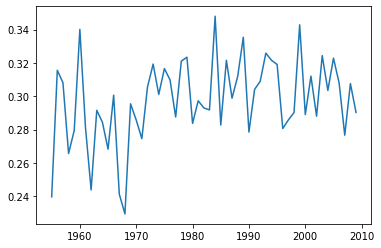

In [105]:
plt.plot(range(1955, 2010), results['eco_cos']);

In [93]:
results['ideo_vector'] = vectors

In [94]:
results

,year,ideology_cos,missing_ideo,eco_vect,eco_missing,eco_cos,ideo_vector
0,1955,0.955973,5,"[-33016.7381067276, -23681.082468405366, -3142...",1,0.239595,"[5.0075283870100975, 24.824629366397858, -7.29..."
1,1956,0.945316,5,"[-59241.95551223308, -5664.481774106622, -1798...",1,0.315571,"[7.662925183773041, -2.7106305956840515, 14.33..."
2,1957,0.941469,6,"[38751.355036263354, 17312.66588783264, 13511....",1,0.308104,"[5.559231013059616, 3.9892527759075165, -7.464..."
3,1958,0.931133,5,"[40516.09135346487, 74775.81067712978, 76714.7...",1,0.265619,"[11.379092752933502, 12.372461125254631, 18.52..."
4,1959,0.923711,6,"[-2178.878716662526, 65347.70568140037, 83518....",1,0.279401,"[-17.942972131073475, 14.408881828188896, 17.5..."
5,1960,0.934513,5,"[-294.593071192503, 36495.251204309985, -19696...",1,0.340102,"[0.9995124340057373, 1.456585869193077, 3.4596..."
6,1961,0.924052,6,"[-17536.849571853876, -37921.296834006906, 139...",1,0.281187,"[4.877400577068329, 7.02027028799057, 2.098579..."
7,1962,0.935765,5,"[29515.13129253313, 27492.778593547642, 16117....",1,0.243768,"[-3.9846215322613716, 5.839621990919113, 11.39..."
8,1963,0.910767,6,"[-25094.478096222505, 72864.78377309442, 71768...",1,0.291550,"[-12.453161060810089, 30.265188455581665, 9.75..."
9,1964,0.926786,5,"[-34322.167739629745, 27560.02502208948, -4029...",1,0.284422,"[7.923299700021744, 19.045258849859238, -4.097..."


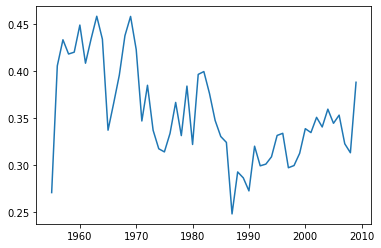

In [108]:
plt.plot(range(1955, 2010), results['gov_cos']);

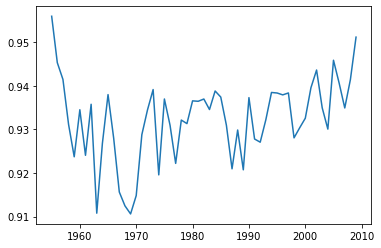

In [109]:
plt.plot(range(1955, 2010), results['ideology_cos']);

In [110]:
results.to_csv('results_chi', index=False)

In [111]:
data = pd.read_csv('china_data.csv')

In [112]:
data

,year,GDP per capita growth (annual %),Gini index (World Bank estimate),"Unemployment, total (% of total labor force) (national estimate)",Income share held by highest 10%
0,1971,4.159176,NaN,NaN,NaN
1,1972,1.290106,NaN,NaN,NaN
2,1973,5.327293,NaN,NaN,NaN
3,1974,0.218006,NaN,NaN,NaN
4,1975,6.816441,NaN,NaN,NaN
5,1976,-3.081322,NaN,NaN,NaN
6,1977,6.114002,NaN,NaN,NaN
7,1978,9.846157,NaN,5.3,NaN
8,1979,6.165664,NaN,5.4,NaN
9,1980,6.490113,NaN,4.9,NaN


In [113]:
data.columns

Index(['year', 'GDP per capita growth (annual %)',
       'Gini index (World Bank estimate)',
       'Unemployment, total (% of total labor force) (national estimate)',
       'Income share held by highest 10%'],
      dtype='object')

In [118]:
results['year'] = results['year'].astype('int')

In [119]:
time_series = results.merge(data, on='year', how='right')

In [138]:
time_series.to_csv('time_series_chi.csv', index=False)

In [122]:
pip install plotly

     |################################| 27.7MB 23.3MB/s eta 0:00:01###########                   | 11.5MB 23.3MB/s eta 0:00:01ta 0:00:01###########################  | 26.7MB 23.3MB/s eta 0:00:01
ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/usr/local/python/anaconda3/lib/python3.7/site-packages/tenacity'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


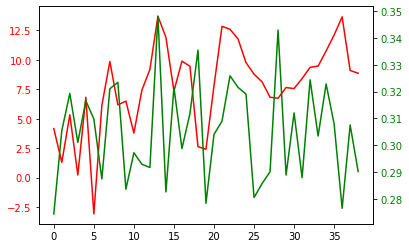

In [132]:
fig, ax = plt.subplots()
ax.plot(time_series['GDP per capita growth (annual %)'])
ax.tick_params(axis='y', labelcolor='red')
ax2 = ax.twinx()
ax2.plot(time_series['eco_cos'], color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.show()

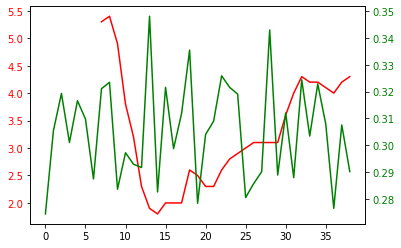

In [137]:
fig, ax = plt.subplots()
ax.plot(time_series['Unemployment, total (% of total labor force) (national estimate)'], color='red')
ax.tick_params(axis='y', labelcolor='red')
ax2 = ax.twinx()
ax2.plot(time_series['eco_cos'], color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.show()

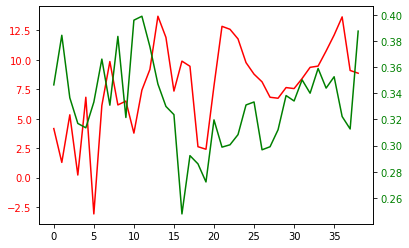

In [136]:
fig, ax = plt.subplots()
ax.plot(time_series['GDP per capita growth (annual %)'], color='red')
ax.tick_params(axis='y', labelcolor='red')
ax2 = ax.twinx()
ax2.plot(time_series['gov_cos'], color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.show()

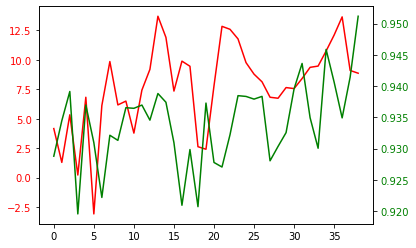

In [139]:
fig, ax = plt.subplots()
ax.plot(time_series['GDP per capita growth (annual %)'], color='red')
ax.tick_params(axis='y', labelcolor='red')
ax2 = ax.twinx()
ax2.plot(time_series['ideology_cos'], color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.show()

In [167]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [168]:
from statsmodels.tsa.stattools import grangercausalitytests

In [169]:
a1=np.array(time_series['GDP per capita growth (annual %)'].pct_change().dropna())

In [170]:
a1

array([-6.89816948e-01,  3.12934530e+00, -9.59077591e-01,  3.02672632e+01,
       -1.45204267e+00, -2.98421382e+00,  6.10427569e-01, -3.73799971e-01,
        5.26219011e-02, -4.18360841e-01,  9.66516471e-01,  2.36781582e-01,
        4.91102874e-01, -1.31004787e-01, -3.82894516e-01,  3.45944744e-01,
       -4.40223893e-02, -7.22547996e-01, -8.17673094e-02,  2.23370147e+00,
        6.49069376e-01, -1.95752228e-02, -6.48233759e-02, -1.70947453e-01,
       -1.00310569e-01, -7.42821680e-02, -1.61047868e-01, -1.21153351e-02,
        1.34419536e-01, -1.13820426e-02,  1.12985188e-01,  1.13017279e-01,
        1.14147169e-02,  1.35264853e-01,  1.25861871e-01,  1.27551223e-01,
       -3.33352907e-01, -2.57783504e-02])

In [171]:
a2=np.array(time_series['eco_cos'].pct_change().dropna())

In [172]:
a2

array([ 0.11278677,  0.04519439, -0.05703311,  0.05154184, -0.02148788,
       -0.07192276,  0.11664245,  0.00743386, -0.12284078,  0.04774727,
       -0.0143406 , -0.00414907,  0.19267398, -0.18764239,  0.13750894,
       -0.0708097 ,  0.04369218,  0.07549624, -0.16972268,  0.09190771,
        0.01621391,  0.05456698, -0.01316489, -0.0078129 , -0.12048364,
        0.0184466 ,  0.01544969,  0.18142736, -0.15713989,  0.07989469,
       -0.07709856,  0.12622349, -0.06441334,  0.06385012, -0.04616732,
       -0.10175833,  0.11198463, -0.05629738])

In [164]:
data = [a1,a2]

In [165]:
data

[array([-6.89816948e-01,  3.12934530e+00, -9.59077591e-01,  3.02672632e+01,
        -1.45204267e+00, -2.98421382e+00,  6.10427569e-01, -3.73799971e-01,
         5.26219011e-02, -4.18360841e-01,  9.66516471e-01,  2.36781582e-01,
         4.91102874e-01, -1.31004787e-01, -3.82894516e-01,  3.45944744e-01,
        -4.40223893e-02, -7.22547996e-01, -8.17673094e-02,  2.23370147e+00,
         6.49069376e-01, -1.95752228e-02, -6.48233759e-02, -1.70947453e-01,
        -1.00310569e-01, -7.42821680e-02, -1.61047868e-01, -1.21153351e-02,
         1.34419536e-01, -1.13820426e-02,  1.12985188e-01,  1.13017279e-01,
         1.14147169e-02,  1.35264853e-01,  1.25861871e-01,  1.27551223e-01,
        -3.33352907e-01, -2.57783504e-02]),
 array([ 0.11278677,  0.04519439, -0.05703311,  0.05154184, -0.02148788,
        -0.07192276,  0.11664245,  0.00743386, -0.12284078,  0.04774727,
        -0.0143406 , -0.00414907,  0.19267398, -0.18764239,  0.13750894,
        -0.0708097 ,  0.04369218,  0.07549624, -0.169

In [173]:
grangercausalitytests(data, maxlag=[3])

TypeError: can only concatenate list (not "int") to list

In [174]:
from scipy.stats import pearsonr
corr, _ = pearsonr(time_series['GDP per capita growth (annual %)'], time_series['eco_cos'])

In [175]:
corr

0.12042570868919601

In [176]:
corr, _ = pearsonr(time_series['GDP per capita growth (annual %)'], time_series['gov_cos'])

In [177]:
corr

-0.09149127700129572

In [178]:
corr, _ = pearsonr(time_series['GDP per capita growth (annual %)'], time_series['ideology_cos'])

In [179]:
corr

0.31739728000934875